# Modern Data Science 
**(Module 01: A Touch of Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session E - Case Study (Tuberculosis)

[Sources](https://rawgit.com/jadianes/data-journalism-python/master/notebooks/tuberculosis-evolution-visual/tuberculosis-evolution-visual.html)


## World differences in infectious tuberculosis prevalence

> [From Wikipedia, the free encyclopedia](https://en.wikipedia.org/wiki/Tuberculosis)  

> Tuberculosis, MTB, or TB (short for tubercle bacillus), in the past also called phthisis, phthisis pulmonalis, or consumption, is a widespread, and in many cases fatal, infectious disease caused by various strains of mycobacteria, usually Mycobacterium tuberculosis. Tuberculosis typically attacks the lungs, but can also affect other parts of the body. It is spread through the air when people who have an active TB infection cough, sneeze, or otherwise transmit respiratory fluids through the air. Most infections do not have symptoms, known as latent tuberculosis. About one in ten latent infections eventually progresses to active disease which, if left untreated, kills more than 50% of those so infected.

In this first approach to the world situation regarding infectious tuberculosis we want to have a look at how different countries have been affected by the disease in the period from 1990 to 2007. By doing so we want to better understand different trends in the prevalence of this important disease. Which countries are getting better and worse? Are there more or less clear groups of countries based on how much are the affected and how their situation is changeing?

This should be enough for a first approach that opens the door to future works in finding the reasons for this situation and how the different approaches to fight the disease have been doing.  

The [Gapminder website](http://www.gapminder.org/) presents itself as *a fact-based worldview*. It is a comprehensive resource for data regarding different countries and territories indicators. For this article, we will use a dataset related to [estimated prevalence (existing cases) per 100K](https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0) coming from the World Health Organization (WHO). We invite the reader to repeat the process with the new cases and deaths datasets and share the results. Our data contains up to 207 countries. The first few of them looks as follows: 

In [1]:
!pip install urllib

  Could not find a version that satisfies the requirement urllib (from versions: )
No matching distribution found for urllib


In [3]:
import urllib

tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
local_tb_existing_file = 'tb_existing_100.csv'
existing_f = urllib.urlretrieve(tb_existing_url_csv, local_tb_existing_file)

import pandas as pd

existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

In [12]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


The [Gapminder website](http://www.gapminder.org/) presents itself as *a fact-based worldview*. It is a comprehensive resource for data regarding different countries and territories indicators. For this notebook again we will use a dataset related to [estimated prevalence (existing cases) per 100K](https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0) coming from the World Health Organization (WHO). We invite the reader to repeat the process with the new cases and deaths datasets and share the results. Our data contains 207 countries, and number of cases from the period from 1990 to 2007.

The reader can check the [complete datasets](https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0) from the Gapminder website.  

## A visual to the world distribution of existing cases

Data tables are accurate and complete. However they are not always the best way to process information, specially in our case where we want to understand how each country relates to others. The following chart is a two dimensional representation of the same data, that originally has 18 different dimensions, one for each year. In the vertical axis we represent the first dimension of variation within countries, that in this case is related with where the country relates to others regarding the number of cases as an static magnitude (e.g. the sum across the years). Those countries at the top of the chart are countries less affected by the disease.  

In the horizontal axis we have coded how the number of existing cases has changed from 1990 to 2007. Countries in the left hand side of the chart have increased the number of cases in that period of time.    

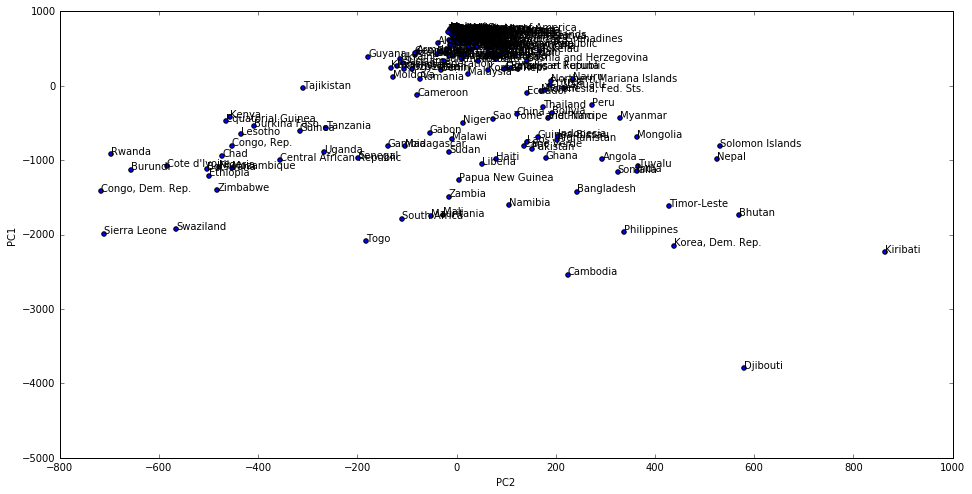

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(existing_df)

existing_2d = pca.transform(existing_df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']

%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(existing_df.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

There are more countries at the very top and on the right hand side. That is, there are more countries with relatively less cases and that have improved their situation with time. But there are some facts that makes us want to keep exploring our data:  
- The distribution is not uniform. There is a high concentration of countries at the very top. This means that there are a group of countries able to deal with the disease in a way that is not accesible to many more (i.e. those countries over and under the 0 line in the vertical axis respectively).  
- There are countries that, far from improving its situation in the 1990-2007 period has most of them have done, ended up with more cases in 2007 than they had in 1990.  
- There is a country, [Djibouti](https://en.wikipedia.org/wiki/Djibouti) that lies quite outside of the rest and might need closer attention.  

## Grouping countries based on their situation  

By [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) our original dataset, we will colour the previous chart in order to identify up to six different groups. This is the minimal number of clusters that we have observed better (and more consistently) separates them in order to have a look at the center of each cluster, and try to understand different world tendencies and differences.    

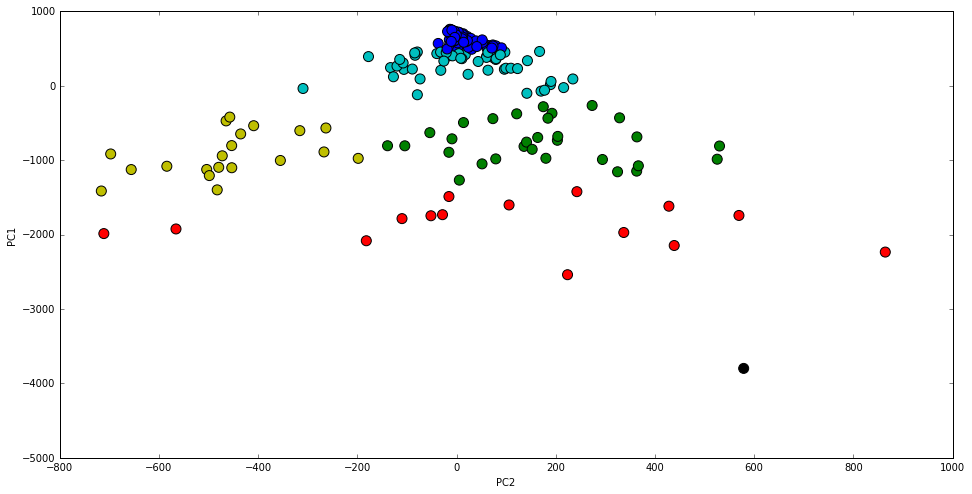

In [7]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(1234)
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit(existing_df)
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

import numpy as np
styles = ['b','r','y','c','g','k']
existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=[styles[i] for i in existing_df_2d.cluster.astype(np.int)],
    s=100,
    figsize=(16,8))

Most clusters divide the distribution vertically (i.e. based on the absolute number of cases) but there is also a division in the horizontal axis that we will have a look at. In order to complement this view, let's have a look at the same data as a line chart that represents how each cluster representative evolves over time.  

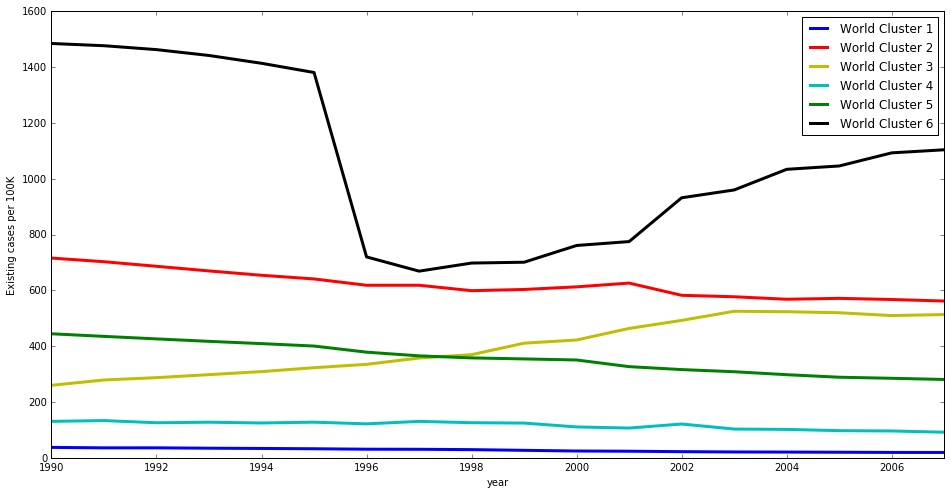

In [8]:
cluster_centers_df = pd.DataFrame(
    clusters.cluster_centers_, 
    index=['World Cluster 1', 'World Cluster 2', 'World Cluster 3', 'World Cluster 4', 'World Cluster 5', 'World Cluster 6']) 
cluster_centers_df.columns = existing_df.columns

ax = cluster_centers_df.T.plot(
    figsize=(16,8),
    style=styles,
    linewidth = 3)
ax.set_ylabel("Existing cases per 100K")

Let's analyse each of these world clusters or groups in detail.  

### World Cluster 1

In [9]:
sum(clusters.labels_ == 0)

90

There are 90 countries in the first cluster, and these are:

In [10]:
existing_df_2d[existing_df_2d.cluster == 0].index

Index([u'Albania', u'Algeria', u'American Samoa', u'Andorra', u'Anguilla',
       u'Antigua and Barbuda', u'Argentina', u'Australia', u'Austria',
       u'Bahamas', u'Barbados', u'Belgium', u'Belize', u'Bermuda',
       u'British Virgin Islands', u'Bulgaria', u'Canada', u'Cayman Islands',
       u'Chile', u'Colombia', u'Cook Islands', u'Costa Rica', u'Cuba',
       u'Cyprus', u'Czech Republic', u'Denmark', u'Dominica', u'Egypt',
       u'Estonia', u'Fiji', u'Finland', u'France', u'French Polynesia',
       u'Germany', u'Greece', u'Grenada', u'Hungary', u'Iceland', u'Iran',
       u'Ireland', u'Israel', u'Italy', u'Jamaica', u'Japan', u'Jordan',
       u'Kuwait', u'Lebanon', u'Libyan Arab Jamahiriya', u'Luxembourg',
       u'Malta', u'Mauritius', u'Mexico', u'Monaco', u'Montserrat',
       u'Netherlands', u'Netherlands Antilles', u'New Caledonia',
       u'New Zealand', u'Norway', u'Oman', u'Panama', u'Poland', u'Portugal',
       u'Puerto Rico', u'Saint Kitts and Nevis', u'Saint Lucia'

The center of this cluster gives us an idea of how an average country might look like:

In [11]:
cluster_centers_df.loc['World Cluster 1']

year
1990    37.277778
1991    35.688889
1992    35.733333
1993    34.400000
1994    33.511111
1995    32.422222
1996    30.800000
1997    30.511111
1998    29.300000
1999    26.777778
2000    24.355556
2001    23.577778
2002    22.022222
2003    20.933333
2004    20.488889
2005    19.922222
2006    19.255556
2007    19.111111
Name: World Cluster 1, dtype: float64

Although this group of countries might be a bit too large and heterogeneous, and probably needs further refinement, it is a good grouping when comparing their situation to that of other countries in the world. In any case it contains those countries with less number of existing cases in our set.

### World Cluster 2

In [23]:
sum(clusters.labels_ == 1)

15

There are just 15 countries in this small group. These are:

In [24]:
existing_df_2d[existing_df_2d.cluster == 1].index

Index([u'Bangladesh', u'Bhutan', u'Cambodia', u'Korea, Dem. Rep.', u'Kiribati',
       u'Mali', u'Mauritania', u'Namibia', u'Philippines', u'Sierra Leone',
       u'South Africa', u'Swaziland', u'Timor-Leste', u'Togo', u'Zambia'],
      dtype='object', name=u'country')

Apart from the world cluster 6, that is formed by a single country as we will see, this group is represented by the centroid with the highest prevalence of tuberculosis per 100K:

In [25]:
cluster_centers_df.loc['World Cluster 2']

year
1990    715.933333
1991    702.800000
1992    686.400000
1993    669.800000
1994    654.200000
1995    641.066667
1996    618.400000
1997    618.466667
1998    599.000000
1999    603.333333
2000    612.733333
2001    626.200000
2002    582.400000
2003    577.200000
2004    568.266667
2005    571.466667
2006    567.400000
2007    561.866667
Name: World Cluster 2, dtype: float64

These are by all means the countries with the most tuberculosis cases every year. We can also see that the number of cases descends progressively. The total decrease between 1990 and 2007 is over 20%.

### World Cluster 3

In [26]:
sum(clusters.labels_ == 2)

20

This is a very important group of countries. There are 20 of them:

In [27]:
existing_df_2d[existing_df_2d.cluster == 2].index

Index([u'Botswana', u'Burkina Faso', u'Burundi', u'Central African Republic',
       u'Chad', u'Congo, Rep.', u'Cote d'Ivoire', u'Congo, Dem. Rep.',
       u'Equatorial Guinea', u'Ethiopia', u'Guinea', u'Kenya', u'Lesotho',
       u'Mozambique', u'Nigeria', u'Rwanda', u'Senegal', u'Uganda',
       u'Tanzania', u'Zimbabwe'],
      dtype='object', name=u'country')

The average country that represents them looks like this:

In [28]:
cluster_centers_df.loc['World Cluster 3']

year
1990    259.85
1991    278.90
1992    287.30
1993    298.05
1994    309.00
1995    322.95
1996    335.00
1997    357.65
1998    369.65
1999    410.85
2000    422.25
2001    463.75
2002    492.45
2003    525.25
2004    523.60
2005    519.90
2006    509.80
2007    513.50
Name: World Cluster 3, dtype: float64

This is the only cluster where the number of cases has increased over the years, and is about to overtake the first position by 2007. It represents a country that might be in the middle of an humanitarian crisis and probably being affected by other infectious diseases such as HIV. We can see how the number of existing cases per 100K has doubled in the 1990-2007 period.  

### World Cluster 4

In [29]:
sum(clusters.labels_ == 3)

51

The fourth cluster contains 51 countries.

In [30]:
existing_df_2d[existing_df_2d.cluster == 3].index

Index([u'Armenia', u'Azerbaijan', u'Bahrain', u'Belarus', u'Benin',
       u'Bosnia and Herzegovina', u'Brazil', u'Brunei Darussalam', u'Cameroon',
       u'Comoros', u'Croatia', u'Dominican Republic', u'Ecuador',
       u'El Salvador', u'Eritrea', u'Georgia', u'Guam', u'Guatemala',
       u'Guyana', u'Honduras', u'Iraq', u'Kazakhstan', u'Kyrgyzstan',
       u'Latvia', u'Lithuania', u'Malaysia', u'Maldives',
       u'Micronesia, Fed. Sts.', u'Morocco', u'Nauru', u'Nicaragua', u'Niue',
       u'Northern Mariana Islands', u'Palau', u'Paraguay', u'Qatar',
       u'Korea, Rep.', u'Moldova', u'Romania', u'Russian Federation',
       u'Seychelles', u'Sri Lanka', u'Suriname', u'Tajikistan', u'Tokelau',
       u'Turkmenistan', u'Ukraine', u'Uzbekistan', u'Vanuatu',
       u'Wallis et Futuna', u'Yemen'],
      dtype='object', name=u'country')

Represented by its centroid.

In [31]:
cluster_centers_df.loc['World Cluster 4']

year
1990    130.607843
1991    133.411765
1992    125.607843
1993    127.549020
1994    124.823529
1995    127.705882
1996    121.686275
1997    130.509804
1998    125.823529
1999    124.450980
2000    110.588235
2001    106.607843
2002    121.098039
2003    103.019608
2004    101.803922
2005     97.294118
2006     96.176471
2007     91.686275
Name: World Cluster 4, dtype: float64

This cluster is pretty close to the first and larger one. It contains many american countries, some european countries, etc. Some of them are large and rich, such as Russia or Brazil. Structurally the differece with the countries in World Cluster 1 may reside in a larger number of cases per 100K. They also seem to be decreasing the number of cases slightly faster than World Cluster 1. These two reasons made them form a different group.

### World Cluster 5

In [32]:
sum(clusters.labels_ == 4)

30

This group contains 50 countries:

In [33]:
existing_df_2d[existing_df_2d.cluster == 4].index

Index([u'Afghanistan', u'Angola', u'Bolivia', u'Cape Verde', u'China',
       u'Gabon', u'Gambia', u'Ghana', u'Guinea-Bissau', u'Haiti', u'India',
       u'Indonesia', u'Laos', u'Liberia', u'Madagascar', u'Malawi',
       u'Mongolia', u'Myanmar', u'Nepal', u'Niger', u'Pakistan',
       u'Papua New Guinea', u'Peru', u'Sao Tome and Principe',
       u'Solomon Islands', u'Somalia', u'Sudan', u'Thailand', u'Tuvalu',
       u'Viet Nam'],
      dtype='object', name=u'country')

With a tendency given by:

In [34]:
cluster_centers_df.loc['World Cluster 5']

year
1990    444.500000
1991    435.200000
1992    426.166667
1993    417.400000
1994    409.233333
1995    400.566667
1996    378.600000
1997    365.366667
1998    358.033333
1999    354.433333
2000    350.600000
2001    326.733333
2002    316.166667
2003    308.500000
2004    297.866667
2005    288.800000
2006    284.966667
2007    280.800000
Name: World Cluster 5, dtype: float64

It is a relatively large cluster. Still countries with lots of cases, but definitively less than the first cluster. We see countries such as India or China here, the larger countries on earth (if you Google about it, you'll see that China itself has reduced its cases by 85% over time) and american countries such as Peru or Bolivia. In fact, this is the cluster with the fastest decrease in the number of existing cases as we see in the line chart.

### World Cluster 6

In [35]:
sum(clusters.labels_ == 5)

1

The last group is formed by a single country, Djibouti. 

In [36]:
existing_df.loc['Djibouti']

year
1990    1485
1991    1477
1992    1463
1993    1442
1994    1414
1995    1381
1996     720
1997     669
1998     698
1999     701
2000     761
2001     775
2002     932
2003     960
2004    1034
2005    1046
2006    1093
2007    1104
Name: Djibouti, dtype: int64

It is so badly affected by the disease that it forms a separate cluster on its own. You can google about ['high prevalence tuberculosis Djibouti'](https://www.google.co.uk/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=high+prevalence+tuberculosis+djibouti) and see how this situation has been and still is subject to study and actions. Wikipedia also has an [article about health in Djibuti](https://en.wikipedia.org/wiki/Health_in_Djibouti).  

> In Djibouti, malnutrition is severe and the incidence of tuberculosis is high. Malaria is endemic. There were 3,111 reported cases of tuberculosis in 2009. The city of Djibouti’s publicly supplied water is suspect because the system is in disrepair.  

Our dataset estimates existing cases of tuberculosis per 100K. We don't know if that number in Wikipedia makes reference to new or existing cases, but it seems to be by absolute terms and not per 100K. In both cases, new and existing, if we compare the WHO numbers for 2007, it seems a reduction in the number of cases (e.g. the number of estimated new cases in 2007 was 6,769). The population of the country is 810,179.     

## Visualization using `Bokeh`

In this second approach to the World situation of infectious tuberculosis from 1990 to 2007, we want to make a point about how a simple and unprocessed visual representation of tabular data, a heatmap in this case, can provide a lot of information that, although is already there in the tabular data, might be more difficult to percieve.

And for that we will use [Bokeh](http://bokeh.pydata.org/), a Python interactive visualization library that targets modern web browsers for presentation and it works great also with Jupyter notebooks. In words of its authors, Bokeh's goal is to provide elegant, concise construction of novel graphics in the style of [D3.js](http://d3js.org/), but also deliver this capability with high-performance interactivity over very large or streaming datasets. 

The first thing we need to do is import the *Bokeh* library as follows.

In [39]:
import bokeh 
import bkcharts

In [40]:
from bokeh.charts import HeatMap, show, output_notebook, output_file
from bokeh.palettes import YlOrRd9 as palette

When working with iPython/Jupyter notebooks, we generate output by using `output_notebook` as follows.

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
import urllib

tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
local_tb_existing_file = 'tb_existing_100.csv'
existing_f = urllib.urlretrieve(tb_existing_url_csv, local_tb_existing_file)

import pandas as pd

existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

In [43]:
existing_df.head()


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


And finally we create a `HeatMap` object as follows, using our `existing_df` data frame and setting dimensions, title, and palette colours.

In [44]:
# Reverse the color order so dark red is highest prevalence
palette = palette[::-1]  

# Create a heatmap
hm = HeatMap(
    existing_df, 
    title="Infectious Tuberculosis Prevalence 1990-2007",
    height=3000,
    width=800, 
    palette=palette)

In [45]:
show(hm)

## Conclusions

During our analysis, we have seen how most countries improved their situation regarding the prevalence of infectious tuberculosis during the time lapse we considered. However we were also able to discover a group of countries with a high prevalence of the disease that, far from improving their situation, are increasing the number of cases.  

We have just scratched the surface. There are other analysis we can carry out by using complementary datasets form the World Health Organisation, such as detection rates, new cases, or deaths. We can also cross link this datasets with others related to HIV/AIDS in order to confirm the co-ocurrence of both diseases.  

This analysis also opens the door to analyise the impact of Tuberculosis programs. Once we are able to identify different groups of countries and their tendencies, we can follow them over time and associate changes (e.g. prevalence or incidence) with the time when these programs started.  

All these approaches should create awareness on the real situation of a disease that is causing millions of deaths in some countries, while it was about to be neglected in some others.  